In [ ]:
import pandas as pd
import numpy as np
from pycaret.regression import *
import matplotlib.pyplot as plt
import datetime as dt
%matplotlib inline

In [ ]:
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

In [ ]:
Value1=pd.read_csv("FFACapeOI 010118 190224.csv")
Value1.set_index("Date",inplace=True)
Value1.rename(columns={"Value":"FFACapeO010118"},inplace=True)

In [ ]:
Value2=pd.read_csv("FFADV_C3 010118 190224.csv")
Value2.set_index("Date",inplace=True)
Value2.rename(columns={"Value":"C3010118"},inplace=True)

In [ ]:
di_ex=["FFACapeOI 010118 190224.csv",
"FFADV_C3 010118 190224.csv",
"FFADV_C5 010118 190224.csv",
"FFADV_C5TC 010118 190224.csv",
"FFADV_C7 010118 190224.csv",
"FFADVCape_T 020707 190224.csv","ODV_C5TC 010118 190224.csv","OptionsCapeOI 010118 190224.csv"]

In [ ]:
Value3=pd.read_csv("FFADV_C5 010118 190224.csv")
Value3.set_index("Date",inplace=True)
Value3.rename(columns={"Value":"C5010118"},inplace=True)

In [ ]:
Value4=pd.read_csv("FFADV_C5TC 010118 190224.csv")
Value4.set_index("Date",inplace=True)
Value4.rename(columns={"Value":"C5TC010118"},inplace=True)

In [ ]:
Value5=pd.read_csv("FFADVCape_T 020707 190224.csv")
Value5.set_index("Date",inplace=True)
Value5.rename(columns={"Value":"020707"},inplace=True)

In [ ]:
Value6=pd.read_csv("ODV_C5TC 010118 190224.csv")
Value6.set_index("Date",inplace=True)
Value6.rename(columns={"Value":"010118"},inplace=True)

In [ ]:
Value7=pd.read_csv("OptionsCapeOI 010118 190224.csv")
Value7.set_index("Date",inplace=True)
Value7.rename(columns={"Value":"CapeOI010118"},inplace=True)

In [ ]:
df = pd.concat([Value1,Value2,Value3,Value4,Value5,Value6,Value7],axis=1)

In [ ]:
df.reset_index(inplace=True)


In [ ]:
df.head()

In [ ]:



df["Date"]=pd.to_datetime(df["Date"])

In [ ]:
df = (df.set_index('Date')
      .reindex(pd.date_range('2018-02-01', '2023-12-13', freq='D'))
      .rename_axis(['Date']).fillna(method="ffill")
      .reset_index())

In [ ]:
df.set_index("Date",inplace=True)

In [ ]:
df[df.index=='07/01/2020']

In [ ]:
df_M=df.resample("W").mean()

In [ ]:
df_M.fillna(method="ffill",inplace=True)

In [ ]:
df_M.tail()

In [ ]:
Data_1=pd.read_csv("ffa1.csv")
Data_1["Date"]=pd.to_datetime(Data_1["Date"],dayfirst=True)
Data_1.set_index("Date",inplace=True)


In [ ]:
Data_1.head()

In [ ]:
Data_2=pd.read_csv("ffa2.csv")
Data_2["Date"]=pd.to_datetime(Data_2["Date"],dayfirst=True)
Data_2.set_index("Date",inplace=True)
Data_3=pd.read_csv("ffa3.csv")
Data_3["Date"]=pd.to_datetime(Data_3["Date"],dayfirst=True)
Data_3.set_index("Date",inplace=True)

In [ ]:
Data=pd.concat([Data_2,Data_1,Data_3],axis=0)

In [ ]:
Data=Data.iloc[:,1:]

In [ ]:
Data

In [ ]:

Data.reset_index(inplace=True)

In [ ]:
Data

In [ ]:
Data=Data.drop_duplicates()

In [ ]:
Data_F = (Data.set_index('Date')
      .reindex(pd.date_range('2018-02-01', '2023-12-13', freq='D'))
      .rename_axis(['Date']).fillna(method="ffill")
      .reset_index())

In [ ]:
Data_F

In [ ]:

Data_F.set_index("Date",inplace=True)

In [ ]:
Data_F.head(10)

In [ ]:
Data_2= Data_F.loc[:,~Data_F.columns.duplicated()]

In [ ]:
Data_2.shape

In [ ]:
Data_W=Data_2.resample("W-Sun").mean()

In [ ]:
# Data_W=Data_2

In [ ]:
# Data_W.drop("BRXMCOA.",axis=1,inplace=True)

In [ ]:
Data_W.tail()

In [ ]:
Data_new=pd.concat([Data_W,df_M],axis=1)

In [ ]:
Data_new.isnull().sum()

In [ ]:
Tar=pd.read_csv("Target_feature.csv")

Tar["Date"]=pd.to_datetime(Tar["Date"],dayfirst=True)
# Target["Date"]=Target["Date"].dt.date
# Target["Date"]=pd.to_datetime(Target["Date"])

Tar = (Tar.set_index('Date')
      .reindex(pd.date_range('2018-02-01', '2023-12-13', freq='D'))
      .rename_axis(['Date'])
      .reset_index())

Target=Tar.copy()

Target.set_index("Date",inplace=True)



Target.fillna(method="ffill",inplace=True)



Tag_f=Target.resample("W-SUN").mean()

Tag_f.isnull().sum()

In [ ]:
Tag_f.drop("shift_30",axis=1,inplace=True)

In [ ]:
Tag_f.fillna(method="ffill",inplace=True)

In [ ]:
Tag_f=Tag_f.iloc[:,:]

In [ ]:
Tag_f["shift_4"]=Tag_f["Value"].shift(-4)

In [ ]:
Tag_f.shape

In [ ]:
# Tag_f["shift_2"]=Tag_f["Value"].shift(-2)

In [ ]:
cor={}
for i in range(len(Tag_f.columns)):   
    cor[Tag_f.columns[i]]=Tag_f["shift_4"].corr(Tag_f.iloc[:,i])

# Tag_f["shift_4"].corr(Tag_f["shift_+1"])

In [ ]:
Imp_f= {k:v for k,v in cor.items() if v>.30 or v<-.30}
len(Imp_f)

In [ ]:
keys = list(Imp_f.keys())
values = list(Imp_f.values())
sorted_value_index = np.argsort(values)[::-1]
sorted_dict = {keys[i]: values[i] for i in sorted_value_index}

In [ ]:
keys

In [ ]:
Data_new.fillna(method="ffill")

In [ ]:
Final=pd.concat([Data_new,Tag_f[keys]],axis=1)

In [ ]:
Final.isnull().sum()

In [56]:
Data_f=Final.iloc[:-4,:]

In [57]:
Data_f.isnull().sum()

5TC_CCURMON                        0
5TC_C+1MON                         0
5TC_C+2MON                         0
5TC_C+3MON                         0
5TC_C+4MON                         0
                                  ..
EMA_Value_ewm_210-Value_ewm_63     0
EMA_Value_ewm_210-Value_ewm_90     0
EMA_Value_ewm_210-Value_ewm_120    0
EMA_Value_ewm_210-Value_ewm_180    0
shift_4                            0
Length: 223, dtype: int64

In [58]:
Data_f.shape

(303, 223)

In [59]:
Data_f.dropna(axis=1,inplace=True)

In [60]:
Data_f.shape

(303, 223)

In [61]:
f_c=list(Data_f.columns)

In [62]:
f_c.remove("shift_4")

In [63]:
f_c[-10:]

['EMA_Value_ewm_150-Value_ewm_180',
 'EMA_Value_ewm_150-Value_ewm_210',
 'EMA_Value_ewm_210-Value_ewm_7',
 'EMA_Value_ewm_210-Value_ewm_21',
 'EMA_Value_ewm_210-Value_ewm_35',
 'EMA_Value_ewm_210-Value_ewm_49',
 'EMA_Value_ewm_210-Value_ewm_63',
 'EMA_Value_ewm_210-Value_ewm_90',
 'EMA_Value_ewm_210-Value_ewm_120',
 'EMA_Value_ewm_210-Value_ewm_180']

In [64]:
cor={}
for i in range(len(Data_f.columns)):   
    cor[Data_f.columns[i]]=Data_f["shift_4"].corr(Data_f.iloc[:,i])

# Tag_f["shift_4"].corr(Tag_f["shift_+1"])

In [65]:
Data_f.shape

(303, 223)

In [67]:
Imp_f= {k:v for k,v in cor.items() if v>.53 or v<-.65}
len(Imp_f)

55

In [68]:
keys = list(Imp_f.keys())
values = list(Imp_f.values())
sorted_value_index = np.argsort(values)[::-1]
sorted_dict = {keys[i]: values[i] for i in sorted_value_index}

In [69]:
sorted_dict

{'shift_4': 1.0,
 '5TC_C+1MON': 0.6967596457005452,
 '5TC_CCURQ': 0.6546377529806369,
 'Value': 0.6392041653213081,
 '5TC_C+2MON': 0.6309438976402015,
 '5TC_CCURMON': 0.6294641659307209,
 'Value_rollm_3': 0.6222588418770113,
 'Value_ewm_3': 0.6149169663022297,
 'Value_rollm_7': 0.6046831651254819,
 'Value_ewm_7': 0.6040144263352706,
 'EMA_Value_ewm_3-Value_ewm_210': 0.5980350293023741,
 'Value_fshift_3': 0.5953931389041555,
 'EMA_Value_ewm_3-Value_ewm_180': 0.5934784229960713,
 '5TC_C+1Q': 0.5921540016387834,
 'EMA_Value_ewm_14-Value_ewm_180': 0.5907841461065085,
 'EMA_Value_ewm_14-Value_ewm_210': 0.5901682552434787,
 'EMA_Value_ewm_14-Value_ewm_150': 0.5894797428845461,
 'Value_rollm_14': 0.5865796018854351,
 'EMA_Value_ewm_3-Value_ewm_150': 0.5854340755551136,
 'EMA_Value_ewm_14-Value_ewm_120': 0.5844405690249598,
 'Value_rollm_21': 0.5796461000666243,
 'EMA_Value_ewm_14-Value_ewm_100': 0.5775998648994038,
 'Value_ewm_14': 0.5763503769357772,
 'EMA_Value_ewm_14-Value_ewm_90': 0.57267

In [70]:
Data_f=Data_f[keys]

In [71]:
Data_f.shape

(303, 55)

In [72]:
f_c=list(Data_f.columns)

f_c.remove("shift_4")

In [73]:
len(f_c)

54

In [74]:
for i in f_c:
    Data_f[i+"_fshift_1"]=Data_f[i].shift(+1)
    Data_f[i+"_fshift_2"]=Data_f[i].shift(+2)
    Data_f[i+"_fshift_3"]=Data_f[i].shift(+3)
    Data_f[i+"_fshift_4"]=Data_f[i].shift(+4)
    Data_f[i+"_fshift_5"]=Data_f[i].shift(+5)
    Data_f[i+"_fshift_6"]=Data_f[i].shift(+6)
    Data_f[i+"_fshift_7"]=Data_f[i].shift(+7)
    Data_f[i+"_fshift_8"]=Data_f[i].shift(+8)

In [75]:
for i in f_c:
    Data_f[i+"_rollm_3"]=Data_f[i].rolling(3).mean()
    Data_f[i+"_rollm_4"]=Data_f[i].rolling(4).mean()
    Data_f[i+"_rollm_6"]=Data_f[i].rolling(6).mean()
    Data_f[i+"_rollm_8"]=Data_f[i].rolling(8).mean()

In [76]:
for i in f_c:
    Data_f[i+"_ewm_3"]=Data_f[i].ewm(3).mean()
    Data_f[i+"_ewm_4"]=Data_f[i].ewm(4).mean()
    Data_f[i+"_ewm_6"]=Data_f[i].ewm(6).mean()
    Data_f[i+"_ewm_8"]=Data_f[i].ewm(8).mean()

In [77]:
for i in f_c: 
            Data_f[i+"_Delta_1"]=Data_f[i]-Data_f[i].shift(1)
            Data_f[i+"_Delta_2"]=Data_f[i]-Data_f[i].shift(2)
            Data_f[i+"_Delta_3"]=Data_f[i]-Data_f[i].shift(3)
            Data_f[i+"_Delta_4"]=Data_f[i]-Data_f[i].shift(4)
            Data_f[i+"_Delta_6"]=Data_f[i]-Data_f[i].shift(6)
                

In [78]:
for i in f_c:
    Data_f[i+"c"]=Data_f[i].shift(1)-Data_f[i].shift(2)
    Data_f[i+"_Delta_1_3"]=Data_f[i].shift(1)-Data_f[i].shift(3)
    Data_f[i+"_Delta_1_4"]=Data_f[i].shift(1)-Data_f[i].shift(4)
    Data_f[i+"_Delta_2_3"]=Data_f[i].shift(2)-Data_f[i].shift(3)
    Data_f[i+"_Delta_2_4"]=Data_f[i].shift(2)-Data_f[i].shift(4)

In [ ]:
def calc_slope(x):
    slope=np.polyfit(range(len(x)),x,1)[0]
    return(slope)

for i in f_c:
    Data_f[i+"Slope_3shift"]=Data_f[i].rolling(3).apply(calc_slope)
    Data_f[i+"Slope_4shift"]=Data_f[i].rolling(4).apply(calc_slope)
    Data_f[i+"Slope_6shift"]=Data_f[i].rolling(6).apply(calc_slope)
    Data_f[i+"Slope_8shift"]=Data_f[i].rolling(8).apply(calc_slope)

In [79]:
Data_f.reset_index(inplace=True)

In [80]:
from math import ceil
def week_of_month(dt):
    """ Returns the week of the month for the specified date.
    """

    first_day = dt.replace(day=1)

    dom = dt.day
    adjusted_dom = dom + first_day.weekday()

    return int(ceil(adjusted_dom/7.0))

Data_f["week_of_month"]=Data_f["Date"].apply(week_of_month)

Data_f["week"]=Data_f["Date"].dt.weekofyear

Data_f['Month'] = Data_f['Date'].apply(lambda time: time.month)
Data_f['Day of Week'] = Data_f['Date'].apply(lambda time: time.dayofweek)
Data_f['Year'] = Data_f['Date'].apply(lambda t: t.year)
Data_f['Day'] = Data_f['Date'].apply(lambda t: t.day)

In [81]:
Data_f.head()

Date   5TC_CCURMON    5TC_C+1MON    5TC_C+2MON    5TC_C+3MON  \
0 2018-02-04  12550.000000  15512.500000  16677.500000  17007.500000   
1 2018-02-11  13704.285714  16562.857143  17694.285714  17581.428571   
2 2018-02-18  13035.714286  16048.571429  17661.428571  17481.428571   
3 2018-02-25  12987.142857  16567.142857  18900.000000  18472.857143   
4 2018-03-04  14391.428571  17017.142857  17928.571429  17986.428571   

      5TC_CCURQ      5TC_C+1Q      5TC_C+4Q    5TC_C+1CAL         Value  ...  \
0  14031.250000  16950.750000  13920.000000  16561.250000  11473.000000  ...   
1  15133.571429  17609.000000  14412.857143  17040.000000  13037.142857  ...   
2  14542.142857  17558.571429  14411.428571  16987.142857  13103.142857  ...   
3  14777.142857  18605.142857  14810.000000  17555.714286  13241.142857  ...   
4  14721.428571  17915.142857  14885.714286  17695.714286  12632.000000  ...   

   EMA_Value_ewm_42-Value_ewm_90_Delta_1_3  \
0                                      NaN   
1                                      NaN   
2                                      NaN   
3                              -669.408974   
4                              -632.784907   

   EMA_Value_ewm_42-Value_ewm_90_Delta_1_4  \
0                                      NaN   
1                                      NaN   
2                                      NaN   
3                                      NaN   
4                              -976.928266   

   EMA_Value_ewm_42-Value_ewm_90_Delta_2_3  \
0                                      NaN   
1                                      NaN   
2                                      NaN   
3                              -344.143359   
4                              -325.265615   

   EMA_Value_ewm_42-Value_ewm_90_Delta_2_4  week_of_month  week  Month  \
0                                      NaN              1     5      2   
1                                      NaN              2     6      2   
2                                      NaN              3     7      2   
3                                      NaN              4     8      2   
4                              -669.408974              1     9      3   

   Day of Week  Year  Day  
0            6  2018    4  
1            6  2018   11  
2            6  2018   18  
3            6  2018   25  
4            6  2018    4  

[5 rows x 1462 columns]

In [82]:
# Data_f.to_csv("Capesize_lagged_19-23.csv")

In [83]:
# Data_f=pd.read_csv("Capesize_lagged_19-23.csv")


In [84]:
Data_f.set_index("Date",inplace=True)

In [85]:
Data_f=Data_f.iloc[8:,:]

In [86]:
# Data_f.dropna(thresh=68,axis=1,inplace=True)

In [87]:
Data_f.fillna(method="ffill",inplace=True)

In [88]:
Data_f.isnull().sum()

5TC_CCURMON    0
5TC_C+1MON     0
5TC_C+2MON     0
5TC_C+3MON     0
5TC_CCURQ      0
              ..
week           0
Month          0
Day of Week    0
Year           0
Day            0
Length: 1461, dtype: int64

In [89]:
cor={}
for i in range(len(Data_f.columns)):   
    cor[Data_f.columns[i]]=Data_f["shift_4"].corr(Data_f.iloc[:,i])

In [90]:
Imp_f= {k:v for k,v in cor.items() if v>=.585 or v<=-.585}
len(Imp_f)

51

In [91]:
Tag_f["Value"].corr(Final['CapeOI010118'])

-0.1630352297267345

In [92]:
sorted_dict

{'shift_4': 1.0,
 '5TC_C+1MON': 0.6967596457005452,
 '5TC_CCURQ': 0.6546377529806369,
 'Value': 0.6392041653213081,
 '5TC_C+2MON': 0.6309438976402015,
 '5TC_CCURMON': 0.6294641659307209,
 'Value_rollm_3': 0.6222588418770113,
 'Value_ewm_3': 0.6149169663022297,
 'Value_rollm_7': 0.6046831651254819,
 'Value_ewm_7': 0.6040144263352706,
 'EMA_Value_ewm_3-Value_ewm_210': 0.5980350293023741,
 'Value_fshift_3': 0.5953931389041555,
 'EMA_Value_ewm_3-Value_ewm_180': 0.5934784229960713,
 '5TC_C+1Q': 0.5921540016387834,
 'EMA_Value_ewm_14-Value_ewm_180': 0.5907841461065085,
 'EMA_Value_ewm_14-Value_ewm_210': 0.5901682552434787,
 'EMA_Value_ewm_14-Value_ewm_150': 0.5894797428845461,
 'Value_rollm_14': 0.5865796018854351,
 'EMA_Value_ewm_3-Value_ewm_150': 0.5854340755551136,
 'EMA_Value_ewm_14-Value_ewm_120': 0.5844405690249598,
 'Value_rollm_21': 0.5796461000666243,
 'EMA_Value_ewm_14-Value_ewm_100': 0.5775998648994038,
 'Value_ewm_14': 0.5763503769357772,
 'EMA_Value_ewm_14-Value_ewm_90': 0.57267

In [93]:
keys = list(Imp_f.keys())
values = list(Imp_f.values())
sorted_value_index = np.argsort(values)[::-1]
sorted_dict = {keys[i]: values[i] for i in sorted_value_index}

In [397]:
X_Final=Data_f[keys]


In [398]:
X_Final.fillna(method="ffill",inplace=True)

In [399]:
X_Final.shape

(295, 51)

In [400]:
X_Final.tail()

5TC_CCURMON    5TC_C+1MON    5TC_C+2MON     5TC_CCURQ  \
Date                                                                 
2023-10-22  26630.142857  19783.428571  16110.428571  20841.142857   
2023-10-29  25975.714286  16730.000000  14564.000000  19089.714286   
2023-11-05  16869.000000  14153.142857  10084.714286  18318.428571   
2023-11-12  18355.714286  15302.857143  10278.285714  19738.428571   
2023-11-19  20233.000000  17023.714286  11639.142857  20938.000000   

               5TC_C+1Q         Value  Value_rollm_3  Value_rollm_7  \
Date                                                                  
2023-10-22  9257.285714  29770.571429   27521.761905   28742.326531   
2023-10-29  8246.142857  22312.714286   26629.380952   27363.142857   
2023-11-05  8234.571429  16932.571429   23005.285714   19483.428571   
2023-11-12  8848.571429  20517.000000   19920.761905   18324.877551   
2023-11-19  9804.285714  22164.000000   19871.190476   21047.571429   

             Value_ewm_3   Value_ewm_7  ...  Value_rollm_6  \
Date                                    ...                  
2023-10-22  22390.528136  26184.744928  ...   21942.404762   
2023-10-29  22371.074673  26051.551841  ...   23610.214286   
2023-11-05  21011.448862  21979.230419  ...   23665.190476   
2023-11-12  20887.836647  20610.049183  ...   23721.261905   
2023-11-19  21206.877485  21045.737812  ...   23250.285714   

            Value_ewm_3_rollm_3  EMA_Value_ewm_3-Value_ewm_210_rollm_3  \
Date                                                                     
2023-10-22         25598.351305                            9205.047675   
2023-10-29         26965.277237                           10308.734068   
2023-11-05         24749.914143                            7909.543469   
2023-11-12         21681.919404                            4741.562480   
2023-11-19         20003.317277                            3004.289249   

            EMA_Value_ewm_3-Value_ewm_210_rollm_4  5TC_C+1MON_ewm_3  \
Date                                                                  
2023-10-22                            7464.187305      18411.740030   
2023-10-29                            9206.573945      17991.305023   
2023-11-05                            8376.962878      17031.764481   
2023-11-12                            6540.128945      16599.537647   
2023-11-19                            4556.005126      16705.581806   

            5TC_C+1MON_ewm_4  5TC_C+1MON_ewm_6  5TC_C+2MON_ewm_3  \
Date                                                               
2023-10-22      18022.392120      17489.470494      16427.657839   
2023-10-29      17763.913696      17380.974709      15961.743380   
2023-11-05      17041.759528      16919.855873      14492.486106   
2023-11-12      16693.979051      16688.856054      13438.936008   
2023-11-19      16759.926098      16736.692945      12988.987720   

            5TC_C+2MON_ewm_4  5TC_C+1Q_ewm_3  
Date                                          
2023-10-22      16470.214590    12265.016697  
2023-10-29      16088.971672    11260.298237  
2023-11-05      14888.120195    10503.866535  
2023-11-12      13966.153299    10090.042758  
2023-11-19      13500.751211    10018.603497  

[5 rows x 51 columns]

In [392]:
X_Final.dropna(thresh=60,axis=1,inplace=True)

In [401]:
X_Final.shape

(295, 51)

In [453]:
X_Final=pd.concat([X_Final,Data_f[["Month","week"]]],axis=1)

In [454]:
X_Final.dropna(thresh=66,axis=1,inplace=True)

In [455]:
X_Final.fillna(method="ffill",inplace=True)

In [456]:
# X_Final.fillna(0,inplace=True)
X_Final[X_Final["UCOEXOT_ewm_4"].isnull()==False]["UCOEXOT_ewm_4"]

KeyError: 'UCOEXOT_ewm_4'

In [457]:
Tag_f.head

<bound method NDFrame.head of                    Value  Value_fshift_3  Value_fshift_7  Value_fshift_14  \
Date                                                                        
2018-02-04  11473.000000    13765.750000    13102.750000     16777.500000   
2018-02-11  13037.142857    11860.857143    13415.000000     12370.000000   
2018-02-18  13103.142857    13765.428571    11963.428571     13679.571429   
2018-02-25  13241.142857    12803.142857    13668.000000     11874.000000   
2018-03-04  12632.000000    13078.000000    12947.142857     13536.142857   
...                  ...             ...             ...              ...   
2023-11-19  22164.000000    20994.857143    18618.428571     20356.285714   
2023-11-26  24336.428571    21879.428571    21300.571429     17643.714286   
2023-12-03  44283.571429    29422.142857    21284.714286     20899.428571   
2023-12-10  41072.571429    48959.714286    34571.714286     22149.142857   
2023-12-17  36756.000000    37658.000000    50

In [458]:
exp_reg102 = setup(data =X_Final.iloc[:X_Final.shape[0]-50,:], target = 'shift_4', session_id=124,remove_multicollinearity=True,multicollinearity_threshold=.95) 

In [459]:
# columns=['MRYAB03', 'BREXPIOCA', 'shift_4', 'BREXPIOCA_fshift_1',
#        'BREXPIOCA_fshift_2', 'BREXPIOCA_fshift_3', 'BREXPIOCA_rollm_3', 'BREXPIOCA_rollm_4',
#        'BREXPIOCA_rollm_6', 'BREXPIOCA_rollm_8',
#        'CHCN.G.MM_ewm_4', 'CHCN.G.MM_ewm_6', 'CHCN.G.MM_ewm_8',
#        'BREXPIOCA_ewm_3', 'BREXPIOCA_ewm_4', 'SHJGXCN_ewm_8', 'UCOEXOT_ewm_3',
#        'UCOEXOT_ewm_4']

In [460]:
df=get_config('dataset_transformed')

In [461]:
df.columns

Index(['5TC_C+1MON', '5TC_CCURQ', 'Value', 'EMA_Value_ewm_3-Value_ewm_210',
       'Month', 'shift_4'],
      dtype='object')

In [462]:
df=X_Final[df.columns]

<AxesSubplot:xlabel='Date'>

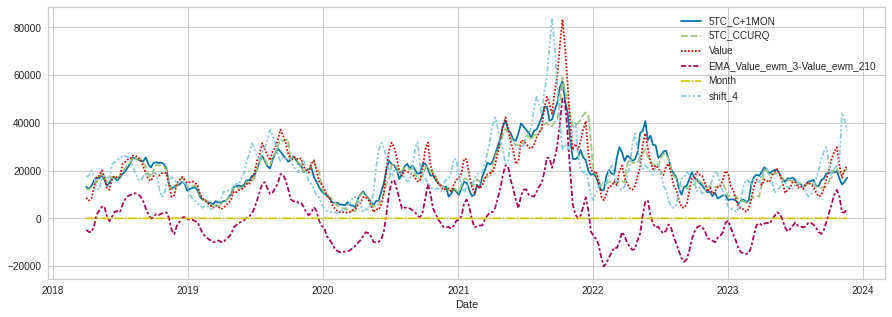

In [108]:
import seaborn as sns
plt.figure(figsize=(15,5))
sns.lineplot(data=df)

In [109]:
df

5TC_C+1MON     5TC_CCURQ         Value  \
Date                                                   
2018-04-01  13202.857143  12199.714286   8665.571429   
2018-04-08  12288.571429  12048.000000   7402.285714   
2018-04-15  13551.428571  12992.142857   8308.857143   
2018-04-22  15852.857143  14533.857143  13038.857143   
2018-04-29  17008.571429  15112.571429  17565.428571   
...                  ...           ...           ...   
2023-10-22  19783.428571  20841.142857  29770.571429   
2023-10-29  16730.000000  19089.714286  22312.714286   
2023-11-05  14153.142857  18318.428571  16932.571429   
2023-11-12  15302.857143  19738.428571  20517.000000   
2023-11-19  17023.714286  20938.000000  22164.000000   

            EMA_Value_ewm_3-Value_ewm_210  Month       shift_4  
Date                                                            
2018-04-01                   -4877.883311      4  17565.428571  
2018-04-08                   -5702.952901      4  17780.714286  
2018-04-15                   -5780.289273      4  20083.857143  
2018-04-22                   -3312.316083      4  17727.857143  
2018-04-29                    1515.412119      4  12447.285714  
...                                   ...    ...           ...  
2023-10-22                   11935.828341     10  22164.000000  
2023-10-29                    9211.152757     10  24336.428571  
2023-11-05                    2581.649308     11  44283.571429  
2023-11-12                    2431.885376     11  41072.571429  
2023-11-19                    3999.333064     11  36756.000000  

[295 rows x 6 columns]

In [110]:
X=df.iloc[:-50,:5]
y=df.iloc[:-50,5:]

In [111]:
y

shift_4
Date                    
2018-04-01  17565.428571
2018-04-08  17780.714286
2018-04-15  20083.857143
2018-04-22  17727.857143
2018-04-29  12447.285714
...                  ...
2022-11-06  13065.714286
2022-11-13  13507.285714
2022-11-20  16186.142857
2022-11-27  19851.714286
2022-12-04  18749.000000

[245 rows x 1 columns]

In [112]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import GridSearchCV
# define dataset

model = ExtraTreesRegressor()
# fit the model on the whole dataset
model.fit(X, y,)

ExtraTreesRegressor()

In [157]:
model = ExtraTreesRegressor(n_estimators=100, n_jobs=4, min_samples_split=25,
                            min_samples_leaf=35, max_features=150)
                            
gsc = GridSearchCV(
    estimator=model,
    param_grid={
        'n_estimators': range(50,126,25),
        'max_features': range(50,401,50),
        'min_samples_leaf': range(20,50,5),
        'min_samples_split': range(15,36,5),
    },
    scoring='r2',
    cv=5
)

grid_result = gsc.fit(X, y)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
)


Best: -0.001796 using {'max_features': 300, 'min_samples_leaf': 20, 'min_samples_split': 30, 'n_estimators': 50}


KeyError: 'mean_train_score'

In [159]:
 grid_result.best_params_

{'max_features': 300,
 'min_samples_leaf': 20,
 'min_samples_split': 30,
 'n_estimators': 50}

In [160]:
    
model = ExtraTreesRegressor(**grid_result.best_params_)

model.fit(X, y)

ExtraTreesRegressor(max_features=300, min_samples_leaf=20, min_samples_split=30,
                    n_estimators=50)

In [164]:
X_t=df.iloc[-50:,:5]

In [175]:
Y_t=model.predict(X_t)

In [184]:
res=pd.DataFrame()

In [185]:
res["Actual"]=df.iloc[-50:,5]

In [186]:
res["Pred"]=Y_t

In [187]:
res

Actual          Pred
Date                                  
2022-12-11  13569.571429  13829.415607
2022-12-18  11666.285714  14577.097862
2022-12-25   8190.571429  14800.478134
2023-01-01   4979.857143  10518.021738
2023-01-08   3905.285714  10249.214634
2023-01-15   3847.142857   9974.163465
2023-01-22   2749.571429   9379.443113
2023-01-29   4095.571429   8931.395270
2023-02-05   8226.571429   8931.395270
2023-02-12  13322.714286   8931.395270
2023-02-19  16291.428571   8931.395270
2023-02-26  15498.857143   8931.395270
2023-03-05  13950.000000  12573.285132
2023-03-12  16245.428571  14658.565247
2023-03-19  15653.142857  14978.634401
2023-03-26  15147.857143  14862.522726
2023-04-02  18075.714286  17604.244479
2023-04-09  19394.142857  19134.728099
2023-04-16  20680.857143  18719.691715
2023-04-23  18152.142857  18163.909268
2023-04-30  15214.714286  19056.930243
2023-05-07  10646.428571  19697.123111
2023-05-14  11790.142857  20073.406891
2023-05-21  12893.000000  19467.224794
2023-05-28  15394.857143  17963.067442
2023-06-04  15054.000000  16209.101820
2023-06-11  12763.571429  17151.319121
2023-06-18  13536.571429  17228.003555
2023-06-25  12271.571429  17519.177207
2023-07-02  14065.285714  16940.486058
2023-07-09  15235.714286  16232.839594
2023-07-16  13998.857143  16323.366285
2023-07-23  13420.142857  15522.445959
2023-07-30  10833.142857  15895.320499
2023-08-06   9113.857143  16598.403247
2023-08-13   9666.857143  16649.368488
2023-08-20  12305.857143  16777.673309
2023-08-27  16602.714286  15631.325152
2023-09-03  20180.571429  15445.028364
2023-09-10  24989.857143  15623.064454
2023-09-17  27804.857143  16460.713694
2023-09-24  29770.571429  17641.714211
2023-10-01  22312.714286  18615.080878
2023-10-08  16932.571429  20320.242494
2023-10-15  20517.000000  21555.025725
2023-10-22  22164.000000  22254.266520
2023-10-29  24336.428571  19689.405360
2023-11-05  44283.571429  17206.231429
2023-11-12  41072.571429  17473.553487
2023-11-19  36756.000000  18606.093542

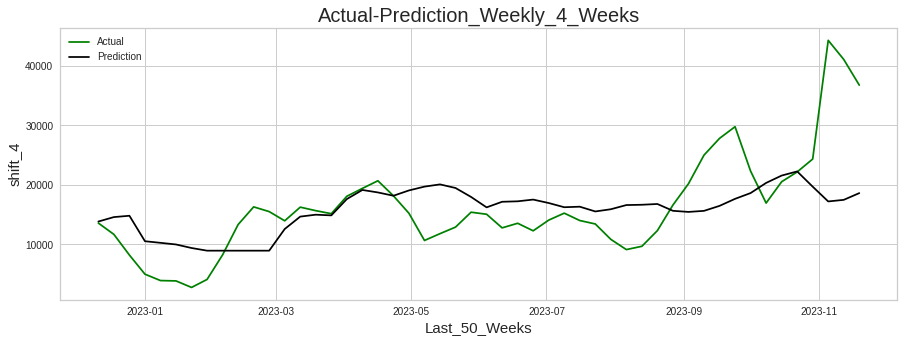

MAPE: 0.42050039459315386


In [192]:
font1 = {'size':20}
font2 = {'size':15}
plt.figure(figsize=(15,5))
plt.title("Actual-Prediction_Weekly_4_Weeks",fontdict=font1)
plt.plot(res["Actual"],color="green",label="Actual")
plt.plot(res["Pred"],color="black",label="Prediction")
plt.xlabel("Last_50_Weeks",fontdict=font2)
plt.ylabel("shift_4",fontdict=font2)
plt.legend()
plt.show()
# print("Directional_Accuracy=",directional_acc(Res.diff1_P.values,Res.diff1_V.values))
Mape=[]
Mape=[]
for i  in range(res["Pred"].shape[0]):
    Mape.append((np.abs((res["Actual"].iloc[i] - res['Pred'].iloc[i]) / res["Actual"].iloc[i])))

print("MAPE:",np.mean(Mape))

In [193]:
df.head()

5TC_C+1MON     5TC_CCURQ         Value  \
Date                                                   
2018-04-01  13202.857143  12199.714286   8665.571429   
2018-04-08  12288.571429  12048.000000   7402.285714   
2018-04-15  13551.428571  12992.142857   8308.857143   
2018-04-22  15852.857143  14533.857143  13038.857143   
2018-04-29  17008.571429  15112.571429  17565.428571   

            EMA_Value_ewm_3-Value_ewm_210  Month       shift_4  
Date                                                            
2018-04-01                   -4877.883311      4  17565.428571  
2018-04-08                   -5702.952901      4  17780.714286  
2018-04-15                   -5780.289273      4  20083.857143  
2018-04-22                   -3312.316083      4  17727.857143  
2018-04-29                    1515.412119      4  12447.285714

In [201]:

from statsmodels.tsa.stattools import grangercausalitytests
maxlag=12
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(df[['5TC_C+1MON', '5TC_CCURQ', 'Value', 'EMA_Value_ewm_3-Value_ewm_210',
       'Month']], variables = df.columns[:5])  

5TC_C+1MON_x  5TC_CCURQ_x  Value_x  \
5TC_C+1MON_y                              1.0       0.0007      0.0   
5TC_CCURQ_y                               0.0       1.0000      0.0   
Value_y                                   0.0       0.0000      1.0   
EMA_Value_ewm_3-Value_ewm_210_y           0.0       0.0000      0.0   
Month_y                                   0.0       0.0000      0.0   

                                 EMA_Value_ewm_3-Value_ewm_210_x  Month_x  
5TC_C+1MON_y                                              0.0000   0.0045  
5TC_CCURQ_y                                               0.0000   0.0098  
Value_y                                                   0.0000   0.0703  
EMA_Value_ewm_3-Value_ewm_210_y                           1.0000   0.0168  
Month_y                                                   0.0004   1.0000

In [202]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(df, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

cointegration_test(df)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
5TC_C+1MON ::  265.61    > 83.9383   =>   True
5TC_CCURQ ::  110.65    > 60.0627   =>   True
Value  ::  38.71     > 40.1749   =>   False
EMA_Value_ewm_3-Value_ewm_210 ::  12.5      > 24.2761   =>   False
Month  ::  -0.77     > 12.3212   =>   False
shift_4 ::  -1.28     > 4.1296    =>   False


In [197]:
df.columns

Index(['5TC_C+1MON', '5TC_CCURQ', 'Value', 'EMA_Value_ewm_3-Value_ewm_210',
       'Month', 'shift_4'],
      dtype='object')

In [203]:
nobs = 50
df_train, df_test = df[0:-nobs], df[-nobs:]
# Check size 119 rows of train set and only 4 rows of test set
print(df_train.shape)  # (119, 8)
print(df_test.shape)  # (4, 8)
     

(245, 6)
(50, 6)


In [204]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")


# ADF Test on each time series column
for name, column in df_train.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "5TC_C+1MON" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -3.2409
 No. Lags Chosen       = 9
 Critical value 1%     = -3.458
 Critical value 5%     = -2.874
 Critical value 10%    = -2.573
 => P-Value = 0.0177. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "5TC_CCURQ" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.9131
 No. Lags Chosen       = 1
 Critical value 1%     = -3.458
 Critical value 5%     = -2.874
 Critical value 10%    = -2.573
 => P-Value = 0.0438. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Value" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significanc

In [239]:
model = VAR(df[['5TC_C+1MON','shift_4']])
for i in [1,2,3,4,5,6,7,8,9]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  31.910804928277138
BIC :  31.985980025569763
FPE :  72224926527573.75
HQIC:  31.940910286438093 

Lag Order = 2
AIC :  31.386183387200777
BIC :  31.511786547918085
FPE :  42741438159146.13
HQIC:  31.4364892999095 

Lag Order = 3
AIC :  31.401306730681863
BIC :  31.577589447228974
FPE :  43393253948008.21
HQIC:  31.471918468896956 

Lag Order = 4
AIC :  31.303368226167382
BIC :  31.53058409836356
FPE :  39345695447980.63
HQIC:  31.394391944952716 

Lag Order = 5
AIC :  30.939344654690814
BIC :  31.217749414365198
FPE :  27341244965919.66
HQIC:  31.050887403367952 

Lag Order = 6
AIC :  30.954171367491675
BIC :  31.284022903446427
FPE :  27750996765666.082
HQIC:  31.086341099939446 

Lag Order = 7
AIC :  30.961180272600973
BIC :  31.34273865594847
FPE :  27948061577832.17
HQIC:  31.114085857704744 

Lag Order = 8
AIC :  30.974312319773798
BIC :  31.407839829654726
FPE :  28320017612950.26
HQIC:  31.148063552027033 

Lag Order = 9
AIC :  30.945637379159038
BIC :  31.4

In [240]:
x = model.select_order(maxlags=12)
x.summary()

<class 'statsmodels.iolib.table.SimpleTable'>

In [241]:
model_fitted = model.fit(3)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 14, Mar, 2024
Time:                     12:23:03
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    31.5776
Nobs:                     292.000    HQIC:                   31.4719
Log likelihood:          -5399.25    FPE:                4.33933e+13
AIC:                      31.4013    Det(Omega_mle):     4.13852e+13
--------------------------------------------------------------------
Results for equation 5TC_C+1MON
                   coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------
const               639.590700       262.792992            2.434           0.015
L1.5TC_C+1MON         1.016320         0.059483           17.086           0.000
L1.shift_4           -0.025901         0.034982        

In [244]:
from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(model_fitted.resid)

for col, val in zip(df.columns, out):
    print(col, ':', round(val, 2))

5TC_C+1MON : 1.95
5TC_CCURQ : 2.0


In [245]:

# Get the lag order
lag_order = model_fitted.k_ar
print(lag_order)  #> 4

# Input data for forecasting
forecast_input = df[['5TC_C+1MON','shift_4']].values[-lag_order:]
forecast_input

3


array([[14153.14285714, 44283.57142857],
       [15302.85714286, 41072.57142857],
       [17023.71428571, 36756.        ]])

In [246]:
df.columns

Index(['5TC_C+1MON', '5TC_CCURQ', 'Value', 'EMA_Value_ewm_3-Value_ewm_210',
       'Month', 'shift_4'],
      dtype='object')

In [247]:
nobs

50

In [248]:
# Forecast
fc = model_fitted.forecast(y=forecast_input, steps=nobs)
df_forecast = pd.DataFrame(fc, index=df[['5TC_C+1MON','shift_4']].index[-nobs:], columns=df[['5TC_C+1MON','shift_4']].columns + '_2d')
df_forecast.head()

5TC_C+1MON_2d    shift_4_2d
Date                                   
2022-12-11   22219.108894  30958.718225
2022-12-18   26417.431456  25756.412075
2022-12-25   28554.056543  22960.257004
2023-01-01   28703.326756  22372.949610
2023-01-08   27644.759456  23066.172219

In [249]:
Res=pd.concat([df_forecast["shift_4_2d"],df["shift_4"][-50:]],axis=1)

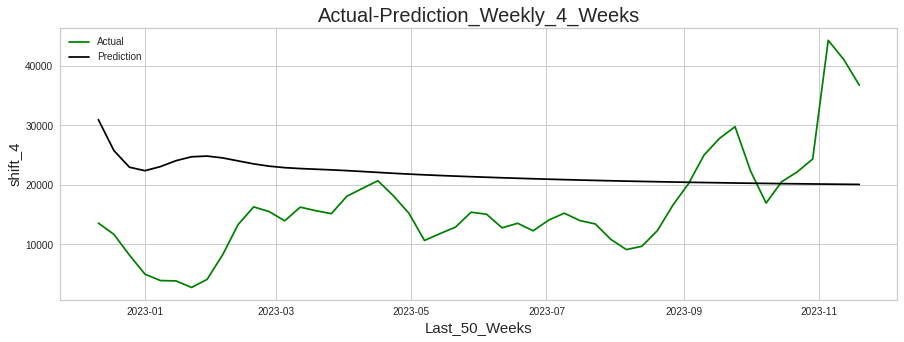

MAPE: 1.0398622140415017


In [250]:
font1 = {'size':20}
font2 = {'size':15}
plt.figure(figsize=(15,5))
plt.title("Actual-Prediction_Weekly_4_Weeks",fontdict=font1)
plt.plot(Res["shift_4"],color="green",label="Actual")
plt.plot(Res["shift_4_2d"],color="black",label="Prediction")
plt.xlabel("Last_50_Weeks",fontdict=font2)
plt.ylabel("shift_4",fontdict=font2)
plt.legend()
plt.show()
# print("Directional_Accuracy=",directional_acc(Res.diff1_P.values,Res.diff1_V.values))
Mape=[]
Mape=[]
for i  in range(Res["shift_4"].shape[0]):
    Mape.append((np.abs((Res["shift_4"].iloc[i] - Res['shift_4_2d'].iloc[i]) / Res["shift_4"].iloc[i])))

print("MAPE:",np.mean(Mape))


In [463]:
#Build and train the model
def fit_model(train,val,timesteps,hl,lr,batch,epochs):
    X_train = []
    Y_train = []
    X_val = []
    Y_val = []

    # Loop for training data
    for i in range(timesteps,train.shape[0]):
        X_train.append(train[i-timesteps:i][-1][:-1])
        Y_train.append(train[i][-1])
    X_train,Y_train = np.array(X_train),np.array(Y_train)

    # Loop for val data
    for i in range(timesteps,val.shape[0]):
        X_val.append(val[i-timesteps:i][-1][:-1])
        Y_val.append(val[i][-1])
    X_val,Y_val = np.array(X_val),np.array(Y_val)

    # Adding Layers to the model
    model = Sequential()
    model.add(LSTM(train.shape[0],input_shape = (train.shape[1]-1,1),return_sequences = True,
                        activation = 'relu'))
    for i in range(len(hl)-1):        
        model.add(LSTM(hl[i],activation = 'relu',return_sequences = True))
    model.add(LSTM(hl[-1],activation = 'relu'))
    model.add(Dense(1))
    model.compile(optimizer = tensorflow.keras.optimizers.Adam(learning_rate = lr), loss = 'mean_squared_error')
    #print(model.summary())

    # Training the data
    history = model.fit(X_train,Y_train,epochs = epochs,batch_size = batch,validation_data = (X_val, Y_val),verbose = 1,
                        shuffle = False, callbacks=callbacks_list)
    model.reset_states()
    return model, history.history['loss']

def forecast(model,train,n_days_for_forecast):
    X_train = []
    Y_train = []

    # Loop for training data
    for i in range(train.shape[0]):
        X_train.append(train[i][:-1])
        Y_train.append(train[i][-1])
    X_train,Y_train = np.array(X_train),np.array(Y_train)

    n_days_for_prediction=n_days_for_forecast
    prediction = model.predict(X_train[-n_days_for_prediction:])
    prediction_copies = np.repeat(prediction, df_for_training.shape[1], axis=-1)
    y_pred_future = sc.inverse_transform(prediction_copies)[:,0]

    forecast_dates = []
    for time_i in predict_period_dates:
        forecast_dates.append(time_i.date())

    df_forecast = pd.DataFrame({'Date':np.array(forecast_dates), 'AL_cash_settlement':y_pred_future})
    df_forecast['Date']=pd.to_datetime(df_forecast['Date'])
#     df_forecast.to_excel('multivariate-3-RNN-forecast.xlsx')
    return df_forecast

# Evaluating the model
def evaluate_model(model,test,timesteps):
    X_test = []
    Y_test = []

    # Loop for testing data
    for i in range(test.shape[0]):
        X_test.append(test[i][:-1])
        Y_test.append(test[i][-1])
    X_test,Y_test = np.array(X_test),np.array(Y_test)
    #print(X_test.shape,Y_test.shape)

    # Prediction Time !!!!
    Y_hat = model.predict(X_test)
    mse = mean_squared_error(Y_test,Y_hat)
    rmse = sqrt(mse)
    r = r2_score(Y_test,Y_hat)

    bdp =1- np.round(np.min(np.abs(Y_hat-Y_test)/ Y_test),2)
    ldp =1- np.round(np.max(np.abs(Y_hat-Y_test)/ Y_test),2)


    mape = mean_absolute_percentage_error(Y_test,Y_hat)
    return mse, rmse, r, Y_test, Y_hat, mape, bdp*100, np.clip(ldp,0.7,1)*100

# Plotting the predictions
def plot_data(Y_test,Y_hat):
    plt.figure(figsize = (20,7))
    plt.plot(Y_test,c = 'r')
    plt.plot(Y_hat,c = 'y')
    plt.xlabel('Day')
    plt.ylabel('Price')
    plt.title("Price Prediction using Multivatiate-RNN")
    plt.legend(['Actual','Predicted'],loc = 'lower right')
    plt.show()

# Plotting the training errors
def plot_error(train_loss,val_loss):
    plt.figure(figsize = (20,7))
    plt.plot(train_loss,c = 'r')
    plt.plot(val_loss,c = 'b')
    plt.ylabel('Loss')
    plt.xlabel('Epochs')
    plt.title('Loss Plot')
    plt.legend(['train','val'],loc = 'upper right')
    plt.show()

In [464]:
series = df
df

5TC_C+1MON     5TC_CCURQ         Value  \
Date                                                   
2018-04-01  13202.857143  12199.714286   8665.571429   
2018-04-08  12288.571429  12048.000000   7402.285714   
2018-04-15  13551.428571  12992.142857   8308.857143   
2018-04-22  15852.857143  14533.857143  13038.857143   
2018-04-29  17008.571429  15112.571429  17565.428571   
...                  ...           ...           ...   
2023-10-22  19783.428571  20841.142857  29770.571429   
2023-10-29  16730.000000  19089.714286  22312.714286   
2023-11-05  14153.142857  18318.428571  16932.571429   
2023-11-12  15302.857143  19738.428571  20517.000000   
2023-11-19  17023.714286  20938.000000  22164.000000   

            EMA_Value_ewm_3-Value_ewm_210  Month       shift_4  
Date                                                            
2018-04-01                   -4877.883311      4  17565.428571  
2018-04-08                   -5702.952901      4  17780.714286  
2018-04-15                   -5780.289273      4  20083.857143  
2018-04-22                   -3312.316083      4  17727.857143  
2018-04-29                    1515.412119      4  12447.285714  
...                                   ...    ...           ...  
2023-10-22                   11935.828341     10  22164.000000  
2023-10-29                    9211.152757     10  24336.428571  
2023-11-05                    2581.649308     11  44283.571429  
2023-11-12                    2431.885376     11  41072.571429  
2023-11-19                    3999.333064     11  36756.000000  

[295 rows x 6 columns]

In [465]:
n_past = 15
n_days_for_prediction=50
train_data = series[:int(len(series)*(1-0.1694915254237288)*.80)].dropna()
val_data = series[int(len(series)*(1-0.1694915254237288)*.80):int(len(series)*(1-0.1694915254237288)*0.9)].dropna()
test_data = series[int(len(series)*(1-0.1694915254237288)):int(len(series)*1)].dropna()

In [466]:
train_data = series[:int(len(series)*(1-0.1694915254237288))].dropna()

In [467]:
train_data.iloc[:,-1]

Date
2018-04-01    17565.428571
2018-04-08    17780.714286
2018-04-15    20083.857143
2018-04-22    17727.857143
2018-04-29    12447.285714
                  ...     
2022-11-06    13065.714286
2022-11-13    13507.285714
2022-11-20    16186.142857
2022-11-27    19851.714286
2022-12-04    18749.000000
Name: shift_4, Length: 245, dtype: float64

In [468]:
from keras.models import Sequential
import tensorflow
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout
from keras.layers import GRU, Bidirectional
from keras.optimizers import SGD
from sklearn import metrics
from sklearn.metrics import mean_squared_error

from keras.layers import LSTM
from keras.callbacks import EarlyStopping
from keras.layers import LSTM


In [469]:
train_dates = pd.to_datetime(train_data.index)
predict_period_dates = pd.date_range(list(train_dates)[-n_past], periods=n_days_for_prediction).tolist()

print(train_data.shape,val_data.shape,test_data.shape)

(245, 6) (24, 6) (50, 6)


In [470]:
earlystop = EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=6,  verbose=1, mode='min')
callbacks_list = [earlystop]

In [471]:
 # Normalisation
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
train = sc.fit_transform(train_data)
val = sc.transform(val_data)
test = sc.transform(test_data)
print(train.shape,val.shape,test.shape)

(245, 6) (24, 6) (50, 6)


In [472]:
train_data.head()

5TC_C+1MON     5TC_CCURQ         Value  \
Date                                                   
2018-04-01  13202.857143  12199.714286   8665.571429   
2018-04-08  12288.571429  12048.000000   7402.285714   
2018-04-15  13551.428571  12992.142857   8308.857143   
2018-04-22  15852.857143  14533.857143  13038.857143   
2018-04-29  17008.571429  15112.571429  17565.428571   

            EMA_Value_ewm_3-Value_ewm_210  Month       shift_4  
Date                                                            
2018-04-01                   -4877.883311      4  17565.428571  
2018-04-08                   -5702.952901      4  17780.714286  
2018-04-15                   -5780.289273      4  20083.857143  
2018-04-22                   -3312.316083      4  17727.857143  
2018-04-29                    1515.412119      4  12447.285714

In [473]:
timesteps = 1
hl = [50,45]
lr = 1e-3
batch_size = 32
num_epochs = 150

model,train_error= fit_model(train,val,timesteps,hl,lr,batch_size,num_epochs)
#plot_error(train_error,val_error)

Epoch 1/150
8/8 [==============================] - 5s 126ms/step - loss: 0.0597 - val_loss: 0.0314
Epoch 2/150
8/8 [==============================] - 0s 54ms/step - loss: 0.0404 - val_loss: 0.0136
Epoch 3/150
8/8 [==============================] - 0s 57ms/step - loss: 0.0211 - val_loss: 0.0062
Epoch 4/150
8/8 [==============================] - 0s 47ms/step - loss: 0.0179 - val_loss: 0.0090
Epoch 5/150
8/8 [==============================] - 0s 49ms/step - loss: 0.0182 - val_loss: 0.0056
Epoch 6/150
8/8 [==============================] - 0s 49ms/step - loss: 0.0172 - val_loss: 0.0054
Epoch 7/150
8/8 [==============================] - 0s 48ms/step - loss: 0.0160 - val_loss: 0.0058
Epoch 8/150
8/8 [==============================] - 0s 43ms/step - loss: 0.0150 - val_loss: 0.0063
Epoch 9/150
8/8 [==============================] - 0s 47ms/step - loss: 0.0143 - val_loss: 0.0061
Epoch 10/150
8/8 [==============================] - 0s 50ms/step - loss: 0.0136 - val_loss: 0.0065
Epoch 11/150
8/8 [

In [474]:
train[1:2][-1][-1]


0.1901643973421106

In [475]:
Y_train

NameError: name 'Y_train' is not defined

In [476]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
from math import sqrt
mse, rmse, r2_value,true,predicted, mape,bdp, ldp = evaluate_model(model,test,1)
# print('MSE = {}'.format(mse))
# print('RMSE = {}'.format(rmse))
# print('R-Squared Score = {}'.format(r2_value))
# print('MAPE Score = {}'.format(mape))
# print('BDP = {}'.format(bdp))
# print('LDP = {}'.format(ldp))

#plot_data(true,predicted)

2/2 [==============================] - 0s 9ms/step


In [477]:
test_data

5TC_C+1MON     5TC_CCURQ         Value  \
Date                                                   
2022-12-11   8944.571429  13838.428571  13507.285714   
2022-12-18   9597.000000  14354.428571  16186.142857   
2022-12-25   9642.285714  12391.428571  19851.714286   
2023-01-01   7661.714286   9057.428571  18749.000000   
2023-01-08   7904.571429   9657.857143  13569.571429   
2023-01-15   7958.428571   9686.714286  11666.285714   
2023-01-22   7426.857143   9242.428571   8190.571429   
2023-01-29   6037.428571   8088.428571   4979.857143   
2023-02-05   7449.571429   7288.857143   3905.285714   
2023-02-12   7863.714286   7181.714286   3847.142857   
2023-02-19   6573.428571   6437.285714   2749.571429   
2023-02-26   7739.857143   6775.714286   4095.571429   
2023-03-05  14491.428571   8062.285714   8226.571429   
2023-03-12  17303.857143   9033.285714  13322.714286   
2023-03-19  18272.142857   9330.142857  16291.428571   
2023-03-26  17807.285714   9045.285714  15498.857143   
2023-04-02  19398.285714  14192.000000  13950.000000   
2023-04-09  21384.142857  20475.714286  16245.428571   
2023-04-16  20192.857143  19569.857143  15653.142857   
2023-04-23  18657.285714  18506.285714  15147.857143   
2023-04-30  19785.285714  18632.000000  18075.714286   
2023-05-07  20220.285714  18539.142857  19394.142857   
2023-05-14  20288.142857  18873.714286  20680.857143   
2023-05-21  18448.000000  17789.857143  18152.142857   
2023-05-28  16736.428571  17015.857143  15214.714286   
2023-06-04  15194.571429  15728.571429  10646.428571   
2023-06-11  16703.428571  15847.000000  11790.142857   
2023-06-18  16641.428571  15720.000000  12893.000000   
2023-06-25  16955.285714  15685.285714  15394.857143   
2023-07-02  15964.285714  15994.571429  15054.000000   
2023-07-09  14205.428571  14407.000000  12763.571429   
2023-07-16  14364.285714  14760.285714  13536.571429   
2023-07-23  13087.571429  13597.714286  12271.571429   
2023-07-30  14077.714286  14089.428571  14065.285714   
2023-08-06  15337.857143  14435.142857  15235.714286   
2023-08-13  15590.428571  14414.857143  13998.857143   
2023-08-20  16082.142857  14481.000000  13420.142857   
2023-08-27  13492.142857  13302.714286  10833.142857   
2023-09-03  13517.428571  12646.714286   9113.857143   
2023-09-10  16010.285714  12727.000000   9666.857143   
2023-09-17  16649.428571  12889.285714  12305.857143   
2023-09-24  18768.714286  13296.857143  16602.714286   
2023-10-01  18981.714286  15317.714286  20180.571429   
2023-10-08  19403.714286  19781.285714  24989.857143   
2023-10-15  19247.000000  20157.571429  27804.857143   
2023-10-22  19783.428571  20841.142857  29770.571429   
2023-10-29  16730.000000  19089.714286  22312.714286   
2023-11-05  14153.142857  18318.428571  16932.571429   
2023-11-12  15302.857143  19738.428571  20517.000000   
2023-11-19  17023.714286  20938.000000  22164.000000   

            EMA_Value_ewm_3-Value_ewm_210  Month       shift_4  
Date                                                            
2022-12-11                   -7340.079257     12  13569.571429  
2022-12-18                   -5779.123648     12  11666.285714  
2022-12-25                   -1831.181974     12   8190.571429  
2023-01-01                   -1009.458251      1   4979.857143  
2023-01-08                   -3951.591351      1   3905.285714  
2023-01-15                   -6805.289735      1   3847.142857  
2023-01-22                   -9385.943601      1   2749.571429  
2023-01-29                  -12584.544296      1   4095.571429  
2023-02-05                  -14219.221355      2   8226.571429  
2023-02-12                  -14665.074653      2  13322.714286  
2023-02-19                  -14933.799031      2  16291.428571  
2023-02-26                  -14635.263409      2  15498.857143  
2023-03-05                  -11669.420365      3  13950.000000  
2023-03-12                   -6991.275470      3  16245.428571  
2023-03-19                   -2847.902105      3  15653.14285

In [478]:
actualvalue

[15566.7412109375,
 6472.9716796875,
 13638.6806640625,
 10377.41796875,
 19158.8828125,
 16555.998046875,
 12697.9072265625,
 9048.861328125,
 19509.912109375,
 25182.8828125,
 11838.7529296875,
 6511.38037109375,
 5312.92333984375,
 24804.306640625,
 8351.6044921875,
 16658.39453125,
 15170.61328125,
 14130.27734375,
 15742.17578125,
 10948.90234375,
 5656.78955078125,
 15068.216796875,
 21019.099609375,
 17328.181640625,
 8604.171875,
 18354.822265625,
 16505.546875,
 10194.8994140625,
 15851.4208984375,
 9894.3212890625,
 13825.4482421875,
 10045.671875,
 15878.4970703125,
 5432.79248046875,
 13699.4404296875,
 13144.95703125,
 4805.8203125,
 8151.37646484375,
 13155.3447265625,
 16286.666015625,
 20486.49609375,
 10513.736328125]

In [479]:
true = true.reshape(-1, 1)
predicted = predicted.reshape(-1, 1)
cols = list(series)[0:35]
df_for_training = df[cols].astype(float)
true_copies = np.repeat(true, df_for_training.shape[1], axis=-1)
predicted_copies = np.repeat(predicted, df_for_training.shape[1], axis=-1)



actualvalue = sc.inverse_transform(true_copies)[:,0]
predictedvalue = sc.inverse_transform(predicted_copies)[:,0]

In [485]:
actualvalue = actualvalue.tolist()
predictedvalue = predictedvalue.tolist()
actualVSpredicted = pd.DataFrame(
    {'Actual': actualvalue,
     'Predicted': predictedvalue
    })#.to_excel('actualVSpredicted-2022-02-21.xlsx', index=False)
# resultant_dfalt = resultant_df.reset_index(level=0)
# li = resultant_dfalt['index'].tail(len(test_data)-timesteps).tolist()
# actualVSpredicted['Dates'] = pd.DataFrame({'col':li})

AttributeError: 'list' object has no attribute 'tolist'

<AxesSubplot:>

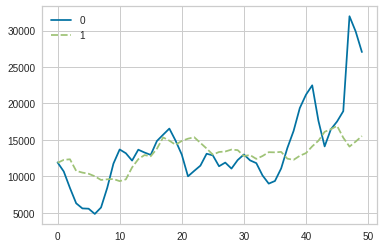

In [486]:
sns.lineplot(data=[actualvalue,predictedvalue])

In [487]:
Res=actualVSpredicted
Res

Actual     Predicted
0   11923.762563  11869.683594
1   10682.407047  12271.739258
2    8415.486707  12355.402344
3    6321.403902  10764.514648
4    5620.550026  10530.307617
5    5582.628260  10372.868164
6    4866.773390  10024.236328
7    5744.657626   9518.660156
8    8438.966523   9608.991211
9   11762.758110   9647.521484
10  13699.004373   9357.881836
11  13182.075723   9603.165039
12  12171.884588  11235.477539
13  13669.002386  12367.922852
14  13282.703507  12929.569336
15  12953.147516  12768.601562
16  14862.746052  13803.243164
17  15722.647730  15347.097656
18  16561.864808  14907.464844
19  14912.594074  14343.573242
20  12996.752889  14865.306641
21  10017.238765  15176.580078
22  10763.188796  15379.534180
23  11482.491098  14597.763672
24  13114.245144  13829.507812
25  12891.932282  12989.776367
26  11398.075569  13353.385742
27  11902.239398  13420.773438
28  11077.184749  13681.884766
29  12247.075904  13606.614258
30  13010.449449  12807.964844
31  12203.750053  12927.815430
32  11826.302691  12406.808594
33  10139.017018  12801.917969
34   9017.669451  13327.509766
35   9378.345515  13305.131836
36  11099.546479  13366.459961
37  13902.030243  12437.623047
38  16235.569903  12277.925781
39  19372.268352  12832.097656
40  21208.259527  13203.046875
41  22490.332025  14124.747070
42  17626.189964  14896.882812
43  14117.168717  16117.032227
44  16454.994375  16471.806641
45  17529.195961  16932.240234
46  18946.091055  15313.320312
47  31955.959000  14092.162109
48  29861.689847  14782.458984
49  27046.348088  15536.802734

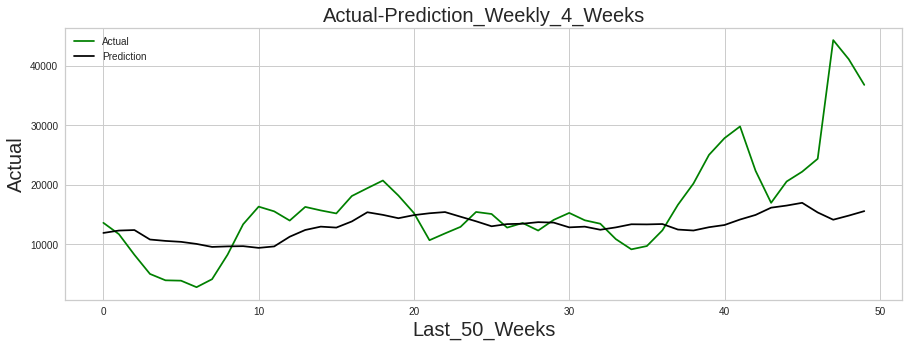

MAPE: 0.26257183879018764


In [488]:
font1 = {'size':20}
font2 = {'size':20}
plt.figure(figsize=(15,5))
plt.title("Actual-Prediction_Weekly_4_Weeks",fontdict=font1)
plt.plot(df["shift_4"].iloc[-50:].values,color="green",label="Actual")
plt.plot(Res["Predicted"],color="black",label="Prediction")
plt.xlabel("Last_50_Weeks",fontdict=font2)
plt.ylabel("Actual",fontdict=font2)
plt.legend()
plt.show()
# print("Directional_Accuracy=",directional_acc(Res.diff1_P.values,Res.diff1_V.values))
Mape=[]
Mape=[]
for i  in range(Res["Predicted"].shape[0]):
    Mape.append((np.abs((Res["Actual"].iloc[i] - Res['Predicted'].iloc[i]) / Res["Actual"].iloc[i])))

print("MAPE:",np.mean(Mape))

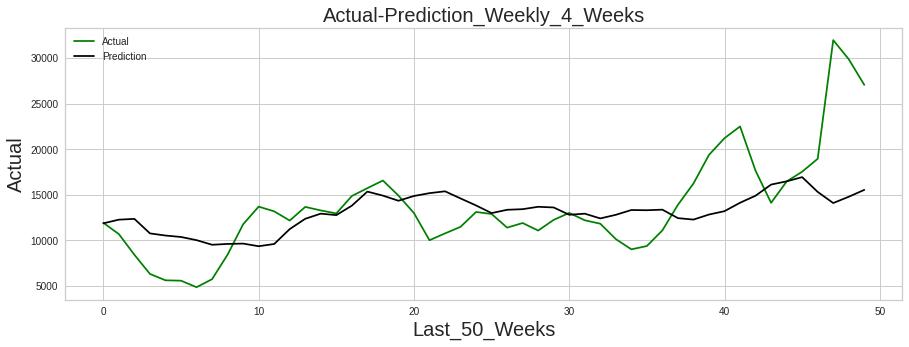

MAPE: 0.26257183879018764


In [489]:
font1 = {'size':20}
font2 = {'size':20}
plt.figure(figsize=(15,5))
plt.title("Actual-Prediction_Weekly_4_Weeks",fontdict=font1)
plt.plot(Res["Actual"],color="green",label="Actual")
plt.plot(Res["Predicted"],color="black",label="Prediction")
plt.xlabel("Last_50_Weeks",fontdict=font2)
plt.ylabel("Actual",fontdict=font2)
plt.legend()
plt.show()
# print("Directional_Accuracy=",directional_acc(Res.diff1_P.values,Res.diff1_V.values))
Mape=[]
Mape=[]
for i  in range(Res["Predicted"].shape[0]):
    Mape.append((np.abs((Res["Actual"].iloc[i] - Res['Predicted'].iloc[i]) / Res["Actual"].iloc[i])))

print("MAPE:",np.mean(Mape))

In [1054]:
n_past = 10
n_days_for_prediction=90

train_data = series[:int(len(series)*0.9)]
val_data = series[int(len(series)*0.9):int(len(series)*1)]

train_dates = pd.to_datetime(train_data.index)
predict_period_dates = pd.date_range(list(train_dates)[-n_past], periods=n_days_for_prediction).tolist()



train_data = series[:int(len(series)*1)]
train_dates = pd.to_datetime(train_data.index)
predict_period_dates = pd.date_range(max(train_dates)+dt.timedelta(days=1), periods=n_days_for_prediction).tolist()

# Normalisation
sc = MinMaxScaler()
train = sc.fit_transform(train_data)
val = sc.transform(val_data)


timesteps = 30
hl = [50,45]
lr = 1e-4
batch_size = 32
num_epochs = 100

X_train = []
Y_train = []

In [330]:
def directional_acc(pred,actual,base):
    pred=np.sign(pred-base)
    actual=np.sign(actual-base)
    score=np.sum(actual == pred)
    return(score*100/len(pred))

directional_acc(Res["Predicted"],df["shift_4"].iloc[-50:].values,X_Final["Value"].iloc[-50:].values)

66.0

In [276]:
X_Final["Value"].iloc[-50:]

df["shift_4"]


Date
2018-04-01    17565.428571
2018-04-08    17780.714286
2018-04-15    20083.857143
2018-04-22    17727.857143
2018-04-29    12447.285714
                  ...     
2023-10-22    22164.000000
2023-10-29    24336.428571
2023-11-05    44283.571429
2023-11-12    41072.571429
2023-11-19    36756.000000
Name: shift_4, Length: 295, dtype: float64

In [270]:
Res


Actual     Predicted
0   11923.762563  12329.560547
1   10682.407047  12714.381836
2    8415.486707  12808.335938
3    6321.403902  11214.512695
4    5620.550026  10962.385742
5    5582.628260  10792.063477
6    4866.773390  10414.162109
7    5744.657626   9857.121094
8    8438.966523   9951.386719
9   11762.758110   9988.669922
10  13699.004373   9677.381836
11  13182.075723   9940.614258
12  12171.884588  11593.000977
13  13669.002386  12677.241211
14  13282.703507  13216.649414
15  12953.147516  13067.797852
16  14862.746052  14037.795898
17  15722.647730  15496.185547
18  16561.864808  15084.985352
19  14912.594074  14558.545898
20  12996.752889  15055.329102
21  10017.238765  15362.323242
22  10763.188796  15561.715820
23  11482.491098  14824.781250
24  13114.245144  14096.931641
25  12891.932282  13304.290039
26  11398.075569  13636.020508
27  11902.239398  13704.415039
28  11077.184749  13957.445312
29  12247.075904  13903.205078
30  13010.449449  13149.897461
31  12203.750053  13263.690430
32  11826.302691  12771.842773
33  10139.017018  13146.389648
34   9017.669451  13650.500000
35   9378.345515  13625.025391
36  11099.546479  13676.770508
37  13902.030243  12803.450195
38  16235.569903  12651.952148
39  19372.268352  13163.082031
40  21208.259527  13518.656250
41  22490.332025  14390.524414
42  17626.189964  15147.076172
43  14117.168717  16326.190430
44  16454.994375  16680.767578
45  17529.195961  17123.988281
46  18946.091055  15582.163086
47  31955.959000  14423.145508
48  29861.689847  15079.356445
49  27046.348088  15790.541016

In [1057]:
X_train = []
Y_train = []

# Loop for training data
for i in range(train.shape[0]):
    X_train.append(train[i][:-1])
    Y_train.append(train[i][-1])
X_train,Y_train = np.array(X_train),np.array(Y_train)

In [689]:
X_train

array([[0.16236781, 0.16372505, 0.07755531, 0.21722711, 0.27272727],
       [0.14504974, 0.16101717, 0.06194859, 0.20549596, 0.27272727],
       [0.16897033, 0.17786878, 0.07314843, 0.20439637, 0.27272727],
       ...,
       [0.08765113, 0.16905923, 0.09790599, 0.15276843, 0.90909091],
       [0.11466192, 0.18010495, 0.11190844, 0.14392815, 0.90909091],
       [0.06985951, 0.18584454, 0.13191497, 0.1715477 , 1.        ]])

In [690]:
Y_train

array([1.87504743e-01, 1.90164397e-01, 2.18617580e-01, 1.89511397e-01,
       1.24274860e-01, 1.18505511e-01, 1.77093794e-01, 1.90009089e-01,
       1.80212313e-01, 1.81966591e-01, 2.51673535e-01, 2.61364419e-01,
       2.74837412e-01, 2.77308225e-01, 2.95576361e-01, 2.91871906e-01,
       2.88419827e-01, 2.71215905e-01, 2.39400651e-01, 2.04800438e-01,
       1.73151081e-01, 1.64291450e-01, 1.88189511e-01, 1.99936465e-01,
       1.90916231e-01, 2.01632502e-01, 2.06175269e-01, 2.03349717e-01,
       1.41334063e-01, 8.14874297e-02, 8.90957705e-02, 1.53615771e-01,
       1.65152705e-01, 1.84980984e-01, 1.68867750e-01, 1.53303389e-01,
       1.57849686e-01, 1.61303531e-01, 1.54434669e-01, 1.42175904e-01,
       9.41221111e-02, 7.31978504e-02, 6.12797049e-02, 4.72419544e-02,
       3.68857161e-02, 2.48793272e-02, 3.78228603e-02, 3.06504417e-02,
       1.81322415e-02, 2.29291494e-02, 4.01966062e-02, 4.92150755e-02,
       6.82968153e-02, 1.10071212e-01, 1.05680224e-01, 1.17301872e-01,
      

In [691]:
train_data

5TC_C+1MON     5TC_CCURQ         Value  \
Date                                                   
2018-04-01  13202.857143  12199.714286   8665.571429   
2018-04-08  12288.571429  12048.000000   7402.285714   
2018-04-15  13551.428571  12992.142857   8308.857143   
2018-04-22  15852.857143  14533.857143  13038.857143   
2018-04-29  17008.571429  15112.571429  17565.428571   
...                  ...           ...           ...   
2022-11-06  10856.857143  13178.857143  11240.142857   
2022-11-13  11084.714286  13526.714286  12818.285714   
2022-11-20   9258.285714  12498.571429  10312.857143   
2022-11-27  10684.285714  13117.428571  11446.285714   
2022-12-04   8319.000000  13439.000000  13065.714286   

            EMA_Value_ewm_3-Value_ewm_210  Month       shift_4  
Date                                                            
2018-04-01                   -4877.883311      4  17565.428571  
2018-04-08                   -5702.952901      4  17780.714286  
2018-04-15                   -5780.289273      4  20083.857143  
2018-04-22                   -3312.316083      4  17727.857143  
2018-04-29                    1515.412119      4  12447.285714  
...                                   ...    ...           ...  
2022-11-06                   -8391.512348     11  13065.714286  
2022-11-13                   -8676.126368     11  13507.285714  
2022-11-20                   -9411.360800     11  16186.142857  
2022-11-27                  -10033.111725     11  19851.714286  
2022-12-04                   -8090.585977     12  18749.000000  

[245 rows x 6 columns]

In [692]:
test_data.head()

5TC_C+1MON     5TC_CCURQ         Value  \
Date                                                  
2022-12-11  8944.571429  13838.428571  13507.285714   
2022-12-18  9597.000000  14354.428571  16186.142857   
2022-12-25  9642.285714  12391.428571  19851.714286   
2023-01-01  7661.714286   9057.428571  18749.000000   
2023-01-08  7904.571429   9657.857143  13569.571429   

            EMA_Value_ewm_3-Value_ewm_210  Month       shift_4  
Date                                                            
2022-12-11                   -7340.079257     12  13569.571429  
2022-12-18                   -5779.123648     12  11666.285714  
2022-12-25                   -1831.181974     12   8190.571429  
2023-01-01                   -1009.458251      1   4979.857143  
2023-01-08                   -3951.591351      1   3905.285714

In [785]:
X_test=[]
Y_test=[]
for i in range(test.shape[0]):
    X_test.append(test[i][:-1])
    Y_test.append(test[i][-1])
X_test,Y_test = np.array(X_test),np.array(Y_test)

In [786]:
X_test[:4]

array([[0.08170886, 0.19297378, 0.13737017, 0.18221869, 1.        ],
       [0.09406693, 0.20218365, 0.17046495, 0.20441294, 1.        ],
       [0.09492472, 0.16714688, 0.21574967, 0.26054625, 1.        ],
       [0.05740943, 0.1076397 , 0.20212666, 0.27222983, 0.        ]])

In [787]:
Y_test[:4]

array([0.13813965, 0.11462633, 0.07168712, 0.03202174])

In [788]:
sc.transform(test_data)[:7]

array([[0.08170886, 0.19297378, 0.13737017, 0.18221869, 1.        ,
        0.13813965],
       [0.09406693, 0.20218365, 0.17046495, 0.20441294, 1.        ,
        0.11462633],
       [0.09492472, 0.16714688, 0.21574967, 0.26054625, 1.        ,
        0.07168712],
       [0.05740943, 0.1076397 , 0.20212666, 0.27222983, 0.        ,
        0.03202174],
       [0.06200955, 0.1183565 , 0.13813965, 0.23039748, 0.        ,
        0.01874642],
       [0.06302969, 0.11887156, 0.11462633, 0.18982253, 0.        ,
        0.01802811],
       [0.05296085, 0.11094169, 0.07168712, 0.15312982, 0.        ,
        0.00446864]])

In [280]:
test_data

5TC_C+1MON     5TC_CCURQ         Value  \
Date                                                   
2022-12-11   8944.571429  13838.428571  13507.285714   
2022-12-18   9597.000000  14354.428571  16186.142857   
2022-12-25   9642.285714  12391.428571  19851.714286   
2023-01-01   7661.714286   9057.428571  18749.000000   
2023-01-08   7904.571429   9657.857143  13569.571429   
2023-01-15   7958.428571   9686.714286  11666.285714   
2023-01-22   7426.857143   9242.428571   8190.571429   
2023-01-29   6037.428571   8088.428571   4979.857143   
2023-02-05   7449.571429   7288.857143   3905.285714   
2023-02-12   7863.714286   7181.714286   3847.142857   
2023-02-19   6573.428571   6437.285714   2749.571429   
2023-02-26   7739.857143   6775.714286   4095.571429   
2023-03-05  14491.428571   8062.285714   8226.571429   
2023-03-12  17303.857143   9033.285714  13322.714286   
2023-03-19  18272.142857   9330.142857  16291.428571   
2023-03-26  17807.285714   9045.285714  15498.857143   
2023-04-02  19398.285714  14192.000000  13950.000000   
2023-04-09  21384.142857  20475.714286  16245.428571   
2023-04-16  20192.857143  19569.857143  15653.142857   
2023-04-23  18657.285714  18506.285714  15147.857143   
2023-04-30  19785.285714  18632.000000  18075.714286   
2023-05-07  20220.285714  18539.142857  19394.142857   
2023-05-14  20288.142857  18873.714286  20680.857143   
2023-05-21  18448.000000  17789.857143  18152.142857   
2023-05-28  16736.428571  17015.857143  15214.714286   
2023-06-04  15194.571429  15728.571429  10646.428571   
2023-06-11  16703.428571  15847.000000  11790.142857   
2023-06-18  16641.428571  15720.000000  12893.000000   
2023-06-25  16955.285714  15685.285714  15394.857143   
2023-07-02  15964.285714  15994.571429  15054.000000   
2023-07-09  14205.428571  14407.000000  12763.571429   
2023-07-16  14364.285714  14760.285714  13536.571429   
2023-07-23  13087.571429  13597.714286  12271.571429   
2023-07-30  14077.714286  14089.428571  14065.285714   
2023-08-06  15337.857143  14435.142857  15235.714286   
2023-08-13  15590.428571  14414.857143  13998.857143   
2023-08-20  16082.142857  14481.000000  13420.142857   
2023-08-27  13492.142857  13302.714286  10833.142857   
2023-09-03  13517.428571  12646.714286   9113.857143   
2023-09-10  16010.285714  12727.000000   9666.857143   
2023-09-17  16649.428571  12889.285714  12305.857143   
2023-09-24  18768.714286  13296.857143  16602.714286   
2023-10-01  18981.714286  15317.714286  20180.571429   
2023-10-08  19403.714286  19781.285714  24989.857143   
2023-10-15  19247.000000  20157.571429  27804.857143   
2023-10-22  19783.428571  20841.142857  29770.571429   
2023-10-29  16730.000000  19089.714286  22312.714286   
2023-11-05  14153.142857  18318.428571  16932.571429   
2023-11-12  15302.857143  19738.428571  20517.000000   
2023-11-19  17023.714286  20938.000000  22164.000000   

            EMA_Value_ewm_3-Value_ewm_210  Month       shift_4  
Date                                                            
2022-12-11                   -7340.079257     12  13569.571429  
2022-12-18                   -5779.123648     12  11666.285714  
2022-12-25                   -1831.181974     12   8190.571429  
2023-01-01                   -1009.458251      1   4979.857143  
2023-01-08                   -3951.591351      1   3905.285714  
2023-01-15                   -6805.289735      1   3847.142857  
2023-01-22                   -9385.943601      1   2749.571429  
2023-01-29                  -12584.544296      1   4095.571429  
2023-02-05                  -14219.221355      2   8226.571429  
2023-02-12                  -14665.074653      2  13322.714286  
2023-02-19                  -14933.799031      2  16291.428571  
2023-02-26                  -14635.263409      2  15498.857143  
2023-03-05                  -11669.420365      3  13950.000000  
2023-03-12                   -6991.275470      3  16245.428571  
2023-03-19                   -2847.902105      3  15653.14285

In [383]:
C_F=df.corr().abs()

In [384]:
C_F

5TC_C+1MON  5TC_CCURQ     Value  \
5TC_C+1MON                       1.000000   0.899372  0.887152   
5TC_CCURQ                        0.899372   1.000000  0.914032   
Value                            0.887152   0.914032  1.000000   
EMA_Value_ewm_3-Value_ewm_210    0.763917   0.800473  0.919955   
Month                            0.253398   0.404740  0.358536   
shift_4                          0.696496   0.651744  0.635510   

                               EMA_Value_ewm_3-Value_ewm_210     Month  \
5TC_C+1MON                                          0.763917  0.253398   
5TC_CCURQ                                           0.800473  0.404740   
Value                                               0.919955  0.358536   
EMA_Value_ewm_3-Value_ewm_210                       1.000000  0.364232   
Month                                               0.364232  1.000000   
shift_4                                             0.598816  0.285359   

                                shift_4  
5TC_C+1MON                     0.696496  
5TC_CCURQ                      0.651744  
Value                          0.635510  
EMA_Value_ewm_3-Value_ewm_210  0.598816  
Month                          0.285359  
shift_4                        1.000000

In [385]:
for i in C_F.columns:
    print((C_F[i]<.5).sum())

1
1
1
1
5
1


In [386]:
thre=20
l=[]
for i in C_F.columns:
    x=(C_F[i]<.5).sum()
    if(x>=2):
        l.append(i)
    

In [387]:
len(l)

1

In [382]:
C_F[l]


5TC_CCURMON  5TC_C+1MON  5TC_C+2MON  \
5TC_CCURMON                               1.000000    0.905247    0.783693   
5TC_C+1MON                                0.905247    1.000000    0.953690   
5TC_C+2MON                                0.783693    0.953690    1.000000   
5TC_CCURQ                                 0.946831    0.899372    0.790414   
5TC_C+1Q                                  0.633658    0.845381    0.941331   
Value                                     0.969252    0.887152    0.744590   
Value_rollm_3                             0.975681    0.846837    0.714026   
Value_rollm_7                             0.977823    0.858617    0.721893   
Value_ewm_3                               0.935533    0.811832    0.680467   
Value_ewm_7                               0.969528    0.840867    0.708423   
EMA_Value_ewm_3-Value_ewm_180             0.877542    0.751617    0.597304   
EMA_Value_ewm_3-Value_ewm_210             0.891120    0.763917    0.609497   
EMA_Value_ewm_14-Value_ewm_150            0.860548    0.704077    0.547145   
EMA_Value_ewm_14-Value_ewm_180            0.871939    0.715413    0.559378   
EMA_Value_ewm_14-Value_ewm_210            0.879366    0.723594    0.569050   
shift_4                                   0.626018    0.696496    0.632156   
5TC_CCURMON_fshift_1                      0.952800    0.840405    0.729644   
5TC_C+1MON_fshift_1                       0.919804    0.967421    0.919576   
5TC_C+1MON_fshift_2                       0.896845    0.913428    0.867638   
5TC_C+1MON_fshift_3                       0.851303    0.855792    0.809762   
5TC_C+1MON_fshift_4                       0.794983    0.806998    0.755694   
5TC_C+2MON_fshift_1                       0.802500    0.941483    0.977945   
5TC_C+2MON_fshift_2                       0.795263    0.912059    0.939175   
5TC_C+2MON_fshift_3                       0.773383    0.878461    0.895309   
5TC_C+2MON_fshift_4                       0.743071    0.848950    0.852374   
5TC_CCURQ_fshift_1                        0.918103    0.848996    0.747560   
5TC_CCURMON_rollm_3                       0.965675    0.858192    0.745378   
5TC_CCURMON_rollm_4                       0.938591    0.833188    0.724164   
5TC_C+1MON_rollm_3                        0.922983    0.976872    0.929418   
5TC_C+1MON_rollm_4                        0.917404    0.959358    0.911610   
5TC_C+1MON_rollm_6                        0.891580    0.925363    0.873930   
5TC_C+1MON_rollm_8                        0.866293    0.893808    0.834975   
5TC_C+2MON_rollm_3                        0.803236    0.946867    0.983938   
5TC_C+2MON_rollm_4                        0.803556    0.938802    0.971099   
5TC_C+2MON_rollm_6                        0.794839    0.922168    0.942671   
5TC_C+2MON_rollm_8                        0.787783    0.904386    0.910127   
5TC_CCURQ_rollm_3                         0.923357    0.859130    0.757234   
5TC_CCURQ_rollm_4                         0.902049    0.836680    0.738543   
5TC_C+1Q_rollm_3                          0.675397    0.869162    0.958645   
5TC_C+1Q_rollm_4                          0.690574    0.876409    0.962696   
Value_rollm_4                             0.958327    0.823560    0.695446   
Value_rollm_6                             0.906819    0.781164    0.658099   
Value_ewm_3_rollm_3                       0.952212    0.811882    0.685828   
EMA_Value_ewm_3-Value_ewm_210_rollm_3     0.881440    0.722081    0.576161   
EMA_Value_ewm_3-Value_ewm_210_rollm_4     0.861982    0.702093    0.558462   
5TC_C+1MON_ewm_3                          0.902242    0.938503    0.881872   
5TC_C+1MON_ewm_4                          0.886247    0.912979    0.853529   
5TC_C+1MON_ewm_6                          0.849575    0.862840    0.801721   
5TC_C+2MON_ewm_3                          0.807158    0.931417    0.947306   
5TC_C+2MON_ewm_4                          0.802527    0.914951    0.922470   
5TC_C+1Q_ewm_3                            0.712930    0.88944

In [547]:
X_Final.iloc[-50:,:][["Value","shift_4"]]

Value       shift_4
Date                                  
2022-12-11  13507.285714  13569.571429
2022-12-18  16186.142857  11666.285714
2022-12-25  19851.714286   8190.571429
2023-01-01  18749.000000   4979.857143
2023-01-08  13569.571429   3905.285714
2023-01-15  11666.285714   3847.142857
2023-01-22   8190.571429   2749.571429
2023-01-29   4979.857143   4095.571429
2023-02-05   3905.285714   8226.571429
2023-02-12   3847.142857  13322.714286
2023-02-19   2749.571429  16291.428571
2023-02-26   4095.571429  15498.857143
2023-03-05   8226.571429  13950.000000
2023-03-12  13322.714286  16245.428571
2023-03-19  16291.428571  15653.142857
2023-03-26  15498.857143  15147.857143
2023-04-02  13950.000000  18075.714286
2023-04-09  16245.428571  19394.142857
2023-04-16  15653.142857  20680.857143
2023-04-23  15147.857143  18152.142857
2023-04-30  18075.714286  15214.714286
2023-05-07  19394.142857  10646.428571
2023-05-14  20680.857143  11790.142857
2023-05-21  18152.142857  12893.000000
2023-05-28  15214.714286  15394.857143
2023-06-04  10646.428571  15054.000000
2023-06-11  11790.142857  12763.571429
2023-06-18  12893.000000  13536.571429
2023-06-25  15394.857143  12271.571429
2023-07-02  15054.000000  14065.285714
2023-07-09  12763.571429  15235.714286
2023-07-16  13536.571429  13998.857143
2023-07-23  12271.571429  13420.142857
2023-07-30  14065.285714  10833.142857
2023-08-06  15235.714286   9113.857143
2023-08-13  13998.857143   9666.857143
2023-08-20  13420.142857  12305.857143
2023-08-27  10833.142857  16602.714286
2023-09-03   9113.857143  20180.571429
2023-09-10   9666.857143  24989.857143
2023-09-17  12305.857143  27804.857143
2023-09-24  16602.714286  29770.571429
2023-10-01  20180.571429  22312.714286
2023-10-08  24989.857143  16932.571429
2023-10-15  27804.857143  20517.000000
2023-10-22  29770.571429  22164.000000
2023-10-29  22312.714286  24336.428571
2023-11-05  16932.571429  44283.571429
2023-11-12  20517.000000  41072.571429
2023-11-19  22164.000000  36756.000000